In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

**The Dataset**: Car Price

In [2]:
data_link = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"
!wget -c $data_link

--2023-09-29 16:49:40--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8003::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



**Features**:

In [3]:
features = ['Make', 'Model', 
            'Year', 'Engine HP', 
            'Engine Cylinders', 'Transmission Type', 
            'Vehicle Style', 'highway MPG', 'city mpg',
            'MSRP']

In [4]:
data = pd.read_csv("data.csv")
data = data[features]
data.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Vehicle Style,Coupe,Convertible,Coupe,Coupe,Convertible
highway MPG,26,28,28,28,28
city mpg,19,19,20,18,18
MSRP,46135,40650,36350,29450,34500


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Vehicle Style      11914 non-null  object 
 7   highway MPG        11914 non-null  int64  
 8   city mpg           11914 non-null  int64  
 9   MSRP               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


**Data preparation**:

In [6]:
# Replacing all white-spaces in column names
data.columns = data.columns.str.replace(" ", "_").str.lower()

# Replacing all white-spaces in entries
categorical_columns = list(data.dtypes[data.dtypes == "object"].index)
for c in categorical_columns:
    data[c] = data[c].str.lower().str.replace(" ", "_")

In [7]:
data.head().T # looks about right

,0,1,2,3,4
make,bmw,bmw,bmw,bmw,bmw
model,1_series_m,1_series,1_series,1_series,1_series
year,2011,2011,2011,2011,2011
engine_hp,335.0,300.0,300.0,230.0,230.0
engine_cylinders,6.0,6.0,6.0,6.0,6.0
transmission_type,manual,manual,manual,manual,manual
vehicle_style,coupe,convertible,coupe,coupe,convertible
highway_mpg,26,28,28,28,28
city_mpg,19,19,20,18,18
msrp,46135,40650,36350,29450,34500


In [8]:
data.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [9]:
# Replacing missing values with 0's
data["engine_hp"].fillna(0, inplace=True)
data["engine_cylinders"].fillna(0, inplace=True)

In [10]:
# Renaming `MSRP` to `price`
data.rename({'msrp': 'price'}, axis=1, inplace=True)


# Question 1

What is the most frequent observation (mode) for the column transmission_type?

- `AUTOMATIC`
- `MANUAL`
- `AUTOMATED_MANUAL`
- `DIRECT_DRIVE`

In [11]:
data["transmission_type"].value_counts(sort="desc")

transmission_type
automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: count, dtype: int64

**Answer**: `AUTOMATIC`

# Question 2


Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- `engine_hp` and `year`
- `engine_hp` and `engine_cylinders`
- `highway_mpg` and `engine_cylinders`
- `highway_mpg` and `city_mpg`


['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'price']


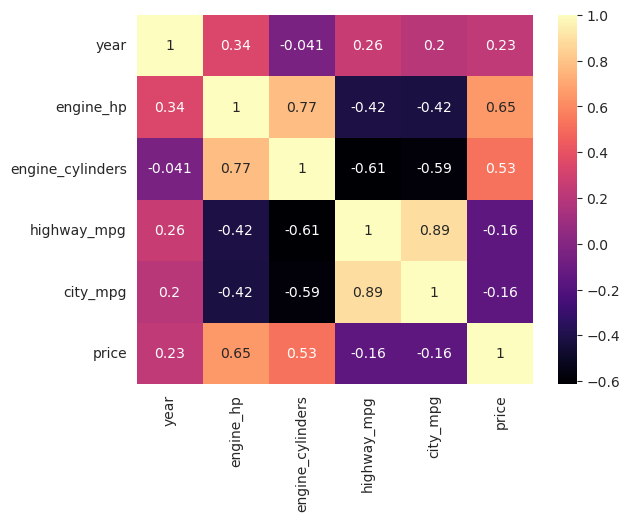

('highway_mpg', 'city_mpg') 0.89


In [12]:
# Obtaining numerical features
num_cols = data.select_dtypes(include=["int", "float"]).columns.tolist()
print(num_cols)

corr_matrix = data[num_cols].corr()
sns.heatmap(corr_matrix, cmap="magma", annot=True)
plt.show()

def get_max_correlation(corr):
    C = corr.abs().stack().sort_values(ascending=False)
    # removing all self-correlations
    C = C[C != 1.0]

    # get the max correlation from the filtered series
    feat = C.index[0]
    max_corr = C.iloc[0]

    print(feat, max_corr.round(2))

get_max_correlation(corr_matrix)
# corr_matrix.unstack().sort_values().drop_duplicates()

**Answer:** `highway_mpg` and `city_mpg`

### Make price binary


- Now we need to turn the `price` variable from numeric into a binary format.
- Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.

In [13]:
df = data.copy()

In [14]:
df["above_average"] = (df["price"] > df["price"].mean()).astype(int)

# save the price (just in case)
price = df["price"].copy()
del df["price"]

### Split the data


* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`price` (`above_average`?)) is not in your dataframe.

In [15]:
from sklearn.model_selection import train_test_split
rs = 42

In [16]:
df_full_train, df_test = train_test_split(df, test_size=0.2, 
                                          random_state=rs)

df_train, df_val = train_test_split(df_full_train, test_size=0.25,
                                    random_state=rs)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Extracing the target values
y_full_train = df_full_train["above_average"].values
y_train = df_train["above_average"].values
y_test = df_test["above_average"].values
y_val = df_val["above_average"].values

print("df_train: ", df_train.shape, f" | ratio: {len(df_train) / len(df)*100:.0f}%")
print("df_val: ", df_val.shape, f"   | ratio: {len(df_val) / len(df) * 100:.0f}%")
print("df_test: ", df_test.shape, f"  | ratio: {len(df_test) / len(df) * 100:.0f}%")

df_train:  (7148, 10)  | ratio: 60%
df_val:  (2383, 10)    | ratio: 20%
df_test:  (2383, 10)   | ratio: 20%


# Question 3

* Calculate the mutual information score between `above_average` and other categorical variables in our dataset. 
  Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the lowest mutual information score?
  
- `make`
- `model`
- `transmission_type`
- `vehicle_style`

In [17]:
from sklearn.metrics import mutual_info_score

In [18]:
# Obtaining all categorical variables (required)
categorical = ["make", "model", "transmission_type", "vehicle_style"]
df_full_train[categorical].nunique()

make                  48
model                902
transmission_type      5
vehicle_style         16
dtype: int64

In [19]:
def mutual_info_churn_score(series, df, feature):
    return mutual_info_score(series, df[feature])

model                0.46
make                 0.24
vehicle_style        0.08
transmission_type    0.02
dtype: float64

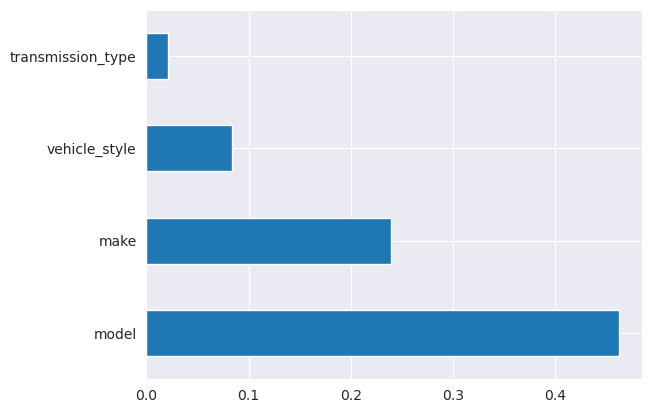

In [20]:
mi_scores = df_train[categorical].apply(mutual_info_churn_score, args=(df_train, "above_average",))
mi_sorted = mi_scores.sort_values(ascending=False)
mi_sorted.plot(kind='barh')
mi_sorted.round(2)

In [21]:
# removing the target value `above_average` from the dataframes
del df_full_train["above_average"]
del df_train["above_average"]
del df_test["above_average"]
del df_val["above_average"]

**Answer:** `transmission_type`

# Question 4


* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - ```
      model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
      ```
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.60
- 0.72
- 0.84
- 0.95


In [22]:
import sklearn
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
print(sklearn.__version__)

1.3.0


In [23]:
# Obtaining all numerical columns
numerical = list(df_train.select_dtypes(include="number").columns)
print(numerical)
for c in numerical:
    print(c, df[c].nunique())

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
year 28
engine_hp 357
engine_cylinders 9
highway_mpg 59
city_mpg 69


In [24]:
# 1-Hot Encoding of categorical values
train_dicts = df_train[categorical + numerical].to_dict(orient="records")
test_dicts = df_test[categorical + numerical].to_dict(orient="records")
val_dicts = df_val[categorical + numerical].to_dict(orient="records")

In [25]:
# Pre-processing of all datasets
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_test = dv.transform(test_dicts)
X_val = dv.transform(val_dicts)

print(f"X_train: {X_train.shape}  y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}   y_test: {y_test.shape}")
print(f"X_val: {X_val.shape}    y_val: {y_val.shape}")

X_train: (7148, 943)  y_train: (7148,)
X_test: (2383, 943)   y_test: (2383,)
X_val: (2383, 943)    y_val: (2383,)


In [26]:
# Training
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [27]:
# Evaluation
y_pred = model.predict_proba(X_val)[:, 1]
decision = (y_pred >= 0.5)
accuracy = (decision == y_val).mean()
print(f"accuracy: {accuracy.round(2)}")

accuracy: 0.95


**Answer**: $0.95$

# Question 5 


* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `year`
- `engine_hp`
- `transmission_type`
- `city_mpg`

> **Note**: the difference doesn't have to be positive

In [28]:
from sklearn.metrics import accuracy_score

In [32]:
# 1. Train and Eval with one feature missing at each iteration
# 2. Checking the validation-accuracy
# 3. (Optional) Is there a simpler way?

features = numerical + categorical
acc_baseline = accuracy

results = [] # [features=m, (acc, diff)=2] -> (m, 2)

for i, f in enumerate(features):
    # Removing one feature
    feats = features.copy()
    feats.remove(f)

    # Getting the data as dictionaries (Train & Val)
    train_dicts = df_train[feats].to_dict(orient="records")
    val_dicts = df_val[feats].to_dict(orient="records")
    
    # Transforming the data
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dicts)
    X_val = dv.transform(val_dicts)

    # Training the model
    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    # Evaluation
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    # y_pred = model.predict_proba(X_val)[:, 1]
    # decision = (y_pred >= 0.5)
    # acc = (decision == y_val).mean()
    print(f"accuracy: {acc.round(2)}")

    # Getting the least usefull feature
    # -> the feature that has the least impact when missing
    diff = acc_baseline - acc
    results.append([acc, diff, np.abs(diff)])
    print(f, results[-1])

    # print(f, acc_baseline.round(6), acc.round(6), diff.round(6))

results = np.array(results)
print("Least usefull feature")
print(features[np.argmin(results[:, -1])], np.min(results[:, -1]))

accuracy: 0.95
year [0.9483843894250944, -0.0012589173310952884, 0.0012589173310952884]
accuracy: 0.92
engine_hp [0.9227864036928242, 0.024339068401174946, 0.024339068401174946]
accuracy: 0.95
engine_cylinders [0.9471254720939991, 0.0, 0.0]
accuracy: 0.94
highway_mpg [0.9441879983214435, 0.002937473772555599, 0.002937473772555599]
accuracy: 0.93
city_mpg [0.9324381032312211, 0.014687368862777994, 0.014687368862777994]
accuracy: 0.95
make [0.9483843894250944, -0.0012589173310952884, 0.0012589173310952884]
accuracy: 0.92
model [0.9160721779269828, 0.0310532941670163, 0.0310532941670163]
accuracy: 0.95
transmission_type [0.9454469156525388, 0.0016785564414603105, 0.0016785564414603105]
accuracy: 0.94
vehicle_style [0.9370541334452371, 0.010071338648761974, 0.010071338648761974]
Least usefull feature
engine_cylinders 0.0


**Answer**: `year`

# Question 6


* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver `'sag'`. Set the seed to `42`.
* This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
* Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

- 0
- 0.01
- 0.1
- 1
- 10

> **Note**: If there are multiple options, select the smallest `alpha`.

In [30]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore") # Disabling warnings for model training
rs = 42

In [31]:
# Get the data where `price` was still in the data frame
df = data.copy()

In [32]:
df["price"] = np.log1p(df["price"])

Data Pre-Processing

In [34]:

df_full_train, df_test = train_test_split(df, test_size=0.2, 
                                          random_state=rs)

df_train, df_val = train_test_split(df_full_train, test_size=0.25,
                                    random_state=rs)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Extracing the target values
y_train = df_train["price"].values
y_test = df_test["price"].values
y_val = df_val["price"].values

del df_train["price"]
del df_test["price"]
del df_val["price"]


print("df_train: ", df_train.shape, f" | ratio: {len(df_train) / len(df)*100:.0f}%")
print("df_val: ", df_val.shape, f"   | ratio: {len(df_val) / len(df) * 100:.0f}%")
print("df_test: ", df_test.shape, f"  | ratio: {len(df_test) / len(df) * 100:.0f}%")

df_train:  (7148, 9)  | ratio: 60%
df_val:  (2383, 9)    | ratio: 20%
df_test:  (2383, 9)   | ratio: 20%


Training and evaluating the Ridge Regression model

In [37]:
alpha = [0, 0.01, 0.1, 1, 10]
rmse_results = []
for a in alpha:
    model = Ridge(alpha=a, solver="sag", random_state=rs)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    print(f"alpha = {a} | rmse = {rmse.round(3)} | rmse(full) = {rmse}")
    rmse_results.append((a, rmse))

alpha = 0 | rmse = 0.498 | rmse(full) = 0.49789528452618315
alpha = 0.01 | rmse = 0.498 | rmse(full) = 0.49789547763140407
alpha = 0.1 | rmse = 0.498 | rmse(full) = 0.497897215502895
alpha = 1 | rmse = 0.498 | rmse(full) = 0.4979145875973558
alpha = 10 | rmse = 0.498 | rmse(full) = 0.4980876466174561


In [39]:
rmse_results = np.array(rmse_results)
idx_min = np.argmin(rmse_results[:, -1]) # index of smallest RMSE
print(f"Best alpha: {rmse_results[idx_min][0]} with rmse: {rmse_results[idx_min][1]}")

Best alpha: 0.0 with rmse: 0.49789528452618315


**Answer**: $\alpha^* = 0$